# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# to display html file in kernel
from IPython.display import HTML

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"      # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city                                      # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()                   # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =      city_weather["coord"]["lat"]                   # YOUR CODE HERE
        city_lng =      city_weather["coord"]["lon"]                   # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]               # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]               # YOUR CODE HERE
        city_clouds =   city_weather["clouds"]["all"]                  # YOUR CODE HERE
        city_wind =     city_weather["wind"]["speed"]                  # YOUR CODE HERE
        city_country =  city_weather["sys"]["country"]                 # YOUR CODE HERE
        city_date =     city_weather["dt"]                             # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | pyay
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | grants
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | flying fish cove
Processing Record 8 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | kingston
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | nuku'alofa
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | twon-brass
Processing Record 17 of Set 1 | zhangatas
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | redencao
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | taro
Processing Record 22 of Set 1 | nouadhib

Processing Record 38 of Set 4 | dayapar
City not found. Skipping...
Processing Record 39 of Set 4 | tagab
Processing Record 40 of Set 4 | hamilton
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | kem'
Processing Record 45 of Set 4 | comodoro rivadavia
Processing Record 46 of Set 4 | darwin
Processing Record 47 of Set 4 | kapa'a
Processing Record 48 of Set 4 | karacabey
Processing Record 49 of Set 4 | malabar
Processing Record 0 of Set 5 | kidal
Processing Record 1 of Set 5 | floro
Processing Record 2 of Set 5 | makoua
Processing Record 3 of Set 5 | iaciara
Processing Record 4 of Set 5 | port douglas
Processing Record 5 of Set 5 | satupa'itea
City not found. Skipping...
Processing Record 6 of Set 5 | canto del llano
Processing Record 7 of Set 5 | la'ie
Processing Record 8 of Set 5 | road town
Processing Record 9 of Set 5 | taoudenni
Processing Record 10 of Set 5 | ilulissat
Proces

Processing Record 25 of Set 8 | boguchany
Processing Record 26 of Set 8 | bull savanna
Processing Record 27 of Set 8 | san patricio
Processing Record 28 of Set 8 | magdagachi
Processing Record 29 of Set 8 | andilamena
Processing Record 30 of Set 8 | ribadesella
Processing Record 31 of Set 8 | alipur duar
City not found. Skipping...
Processing Record 32 of Set 8 | san luis de la loma
Processing Record 33 of Set 8 | itai
Processing Record 34 of Set 8 | taybad
Processing Record 35 of Set 8 | remire-montjoly
Processing Record 36 of Set 8 | ketchikan
Processing Record 37 of Set 8 | novyy urgal
Processing Record 38 of Set 8 | nampula
Processing Record 39 of Set 8 | safotu
Processing Record 40 of Set 8 | heroica caborca
Processing Record 41 of Set 8 | tres arroyos
Processing Record 42 of Set 8 | reggane
Processing Record 43 of Set 8 | midvagur
Processing Record 44 of Set 8 | whitehorse
Processing Record 45 of Set 8 | ponta delgada
Processing Record 46 of Set 8 | adolfo lopez mateos
Processing

Processing Record 16 of Set 12 | loa janan
Processing Record 17 of Set 12 | new plymouth
Processing Record 18 of Set 12 | al jubayl
Processing Record 19 of Set 12 | vangaindrano
Processing Record 20 of Set 12 | svitlovods'k
Processing Record 21 of Set 12 | natal
Processing Record 22 of Set 12 | knyaze-volkonskoye
Processing Record 23 of Set 12 | haining
Processing Record 24 of Set 12 | sarkand
Processing Record 25 of Set 12 | saint-francois
Processing Record 26 of Set 12 | palamos
Processing Record 27 of Set 12 | santa cruz
Processing Record 28 of Set 12 | korla
Processing Record 29 of Set 12 | ha'il
Processing Record 30 of Set 12 | kavalerovo
Processing Record 31 of Set 12 | serov
Processing Record 32 of Set 12 | smarhon
Processing Record 33 of Set 12 | eyl
Processing Record 34 of Set 12 | beyneu
Processing Record 35 of Set 12 | aykol
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)                                      # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,43.43,76,95,14.83,NZ,1690307837
1,pyay,18.8167,95.2167,78.48,86,100,7.49,MM,1690308003
2,bethel,41.3712,-73.4140,88.05,58,40,8.05,US,1690307819
3,tiksi,71.6872,128.8694,39.27,81,66,4.54,RU,1690307834
4,grants,35.1473,-107.8514,89.83,13,0,4.61,US,1690308005


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,43.43,76,95,14.83,NZ,1690307837
1,pyay,18.8167,95.2167,78.48,86,100,7.49,MM,1690308003
2,bethel,41.3712,-73.4140,88.05,58,40,8.05,US,1690307819
3,tiksi,71.6872,128.8694,39.27,81,66,4.54,RU,1690307834
4,grants,35.1473,-107.8514,89.83,13,0,4.61,US,1690308005


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

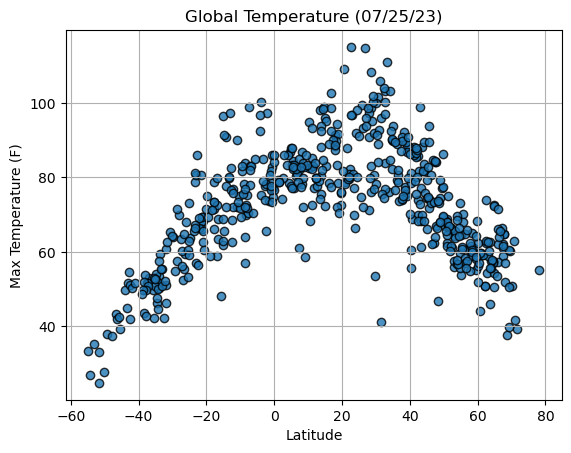

In [32]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Global Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/global/Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

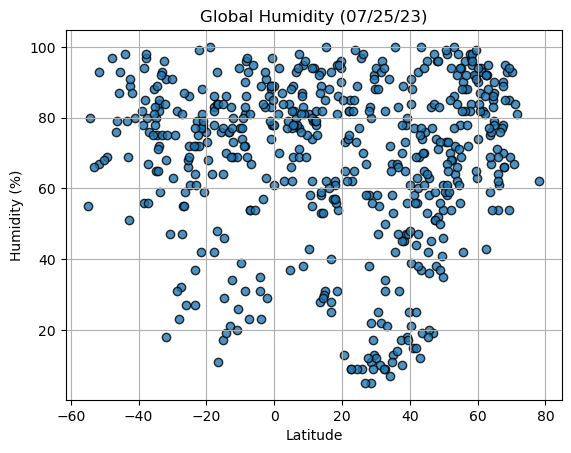

In [33]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Global Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/global/Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

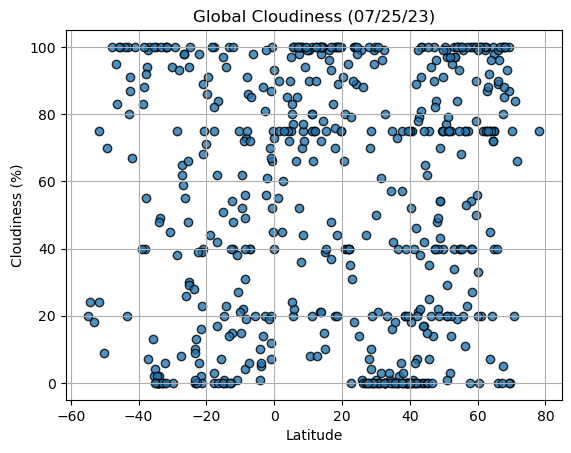

In [34]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]


plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Global Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/global/Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

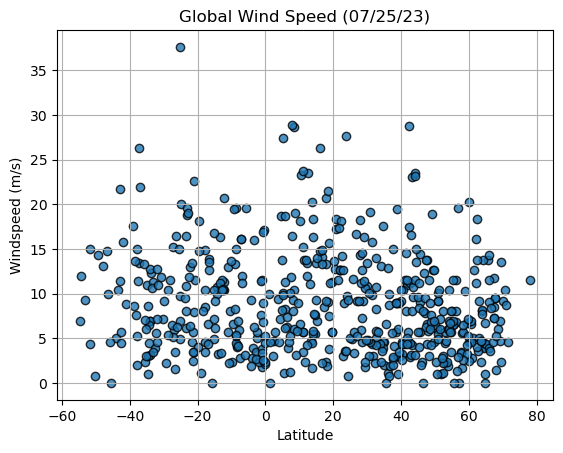

In [35]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]


plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Global Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/global/Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pyay,18.8167,95.2167,78.48,86,100,7.49,MM,1690308003
2,bethel,41.3712,-73.4140,88.05,58,40,8.05,US,1690307819
3,tiksi,71.6872,128.8694,39.27,81,66,4.54,RU,1690307834
4,grants,35.1473,-107.8514,89.83,13,0,4.61,US,1690308005
5,qaqortoq,60.7167,-46.0333,44.17,87,100,6.58,GL,1690307856


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,43.43,76,95,14.83,NZ,1690307837
6,flying fish cove,-10.4217,105.6791,74.88,94,75,8.05,CX,1690307844
7,port-aux-francais,-49.3500,70.2167,38.07,69,70,14.34,TF,1690307815
9,ushuaia,-54.8000,-68.3000,33.46,55,20,6.91,AR,1690307842
10,blackmans bay,-43.0167,147.3167,51.73,69,100,11.36,AU,1690307814


###  Temperature vs. Latitude Linear Regression Plot

r value is: -0.6417887804029655


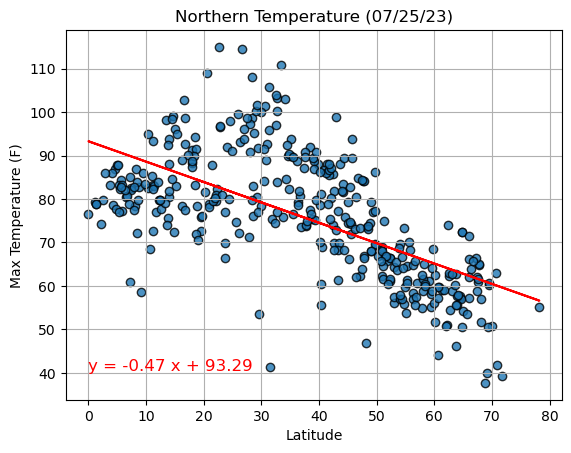

In [39]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = northern_hemi_df["Lat"]
max_temps = northern_hemi_df["Max Temp"]

# scatter
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, max_temps)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (0,40.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Northern Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/northern/Temperature.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

r value is: 0.8557674101906042


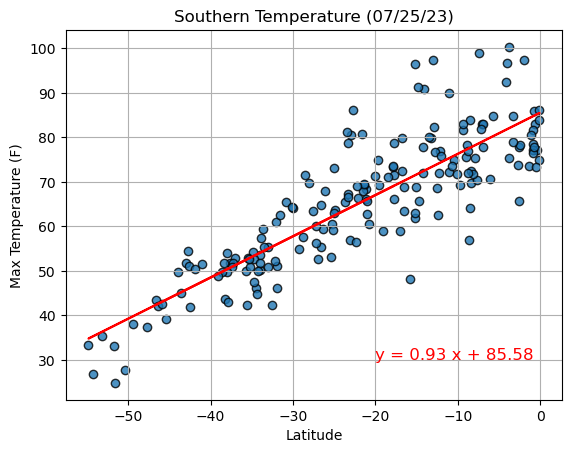

In [40]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = southern_hemi_df["Lat"]
max_temps = southern_hemi_df["Max Temp"]

# scatter
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, max_temps)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (-20,30), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Southern Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/southern/Temperature.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

**Discussion about the linear relationship:** From both graph, we can say clearly, closer to lat0(equador) means higher the temperature.
Main difference between graphs is the slope, that means temperature increase per latitude is more in southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

r value is: 0.095609004894029


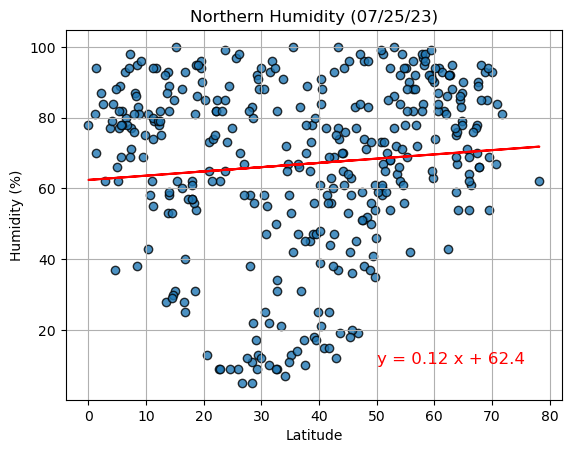

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = northern_hemi_df["Lat"]
humids = northern_hemi_df["Humidity"]

# scatter
plt.scatter(lats, humids, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, humids)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (50,10.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Northern Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/northern/Humidity.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

r value is: -0.11229186917149848


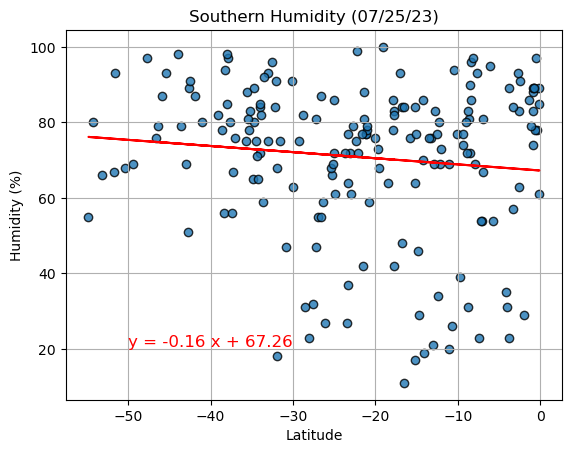

In [49]:
# Southern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = southern_hemi_df["Lat"]
humids = southern_hemi_df["Humidity"]

# scatter
plt.scatter(lats, humids, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, humids)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (-50,20.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Southern Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/southern/Humidity.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

**Discussion about the linear relationship:** From both graph, we can say clearly, closer to lat0(equador) means lower the humidity. Main difference between graphs is the slope, that means humidity decrease per latitude is more in northern hemisphere.
In other words, when we are getting closer to Lat0, weather is faster drying in southern hemisphere than northern.

### Cloudiness vs. Latitude Linear Regression Plot

r value is: -0.03819902601576838


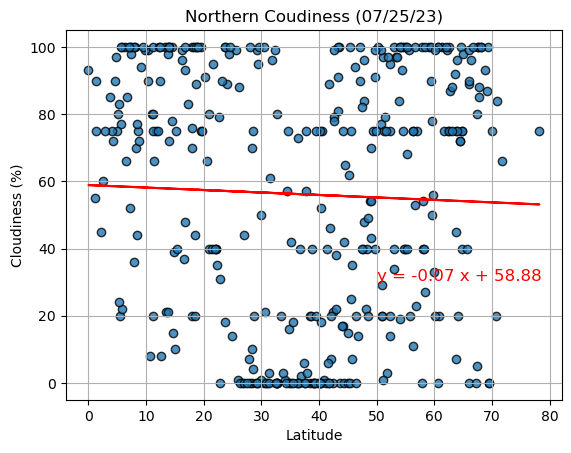

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = northern_hemi_df["Lat"]
clouds = northern_hemi_df["Cloudiness"]

# scatter
plt.scatter(lats, clouds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, clouds)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (50,30.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Northern Coudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/northern/Cloudiness.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

r value is: -0.09591098688249558


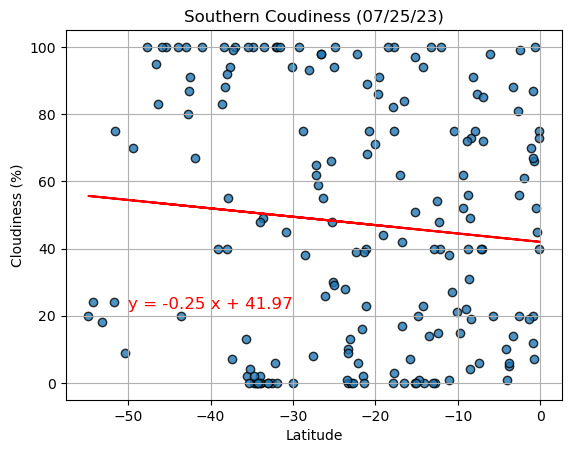

In [51]:
# Southern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = southern_hemi_df["Lat"]
clouds = southern_hemi_df["Cloudiness"]

# scatter
plt.scatter(lats, clouds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, clouds)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (-50,22), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Southern Coudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/southern/Cloudiness.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

**Discussion about the linear relationship:** From both graph, we can say clearly, closer to lat0(equador) means clearer the sky. Main difference between graphs is the slope, that means clear sky per latitude is more in southern hemisphere.
In other words, when we are getting closer to Lat0, weather is faster clearing sky in southern hemisphere than northern.

### Wind Speed vs. Latitude Linear Regression Plot

r value is: -0.23006116400317003


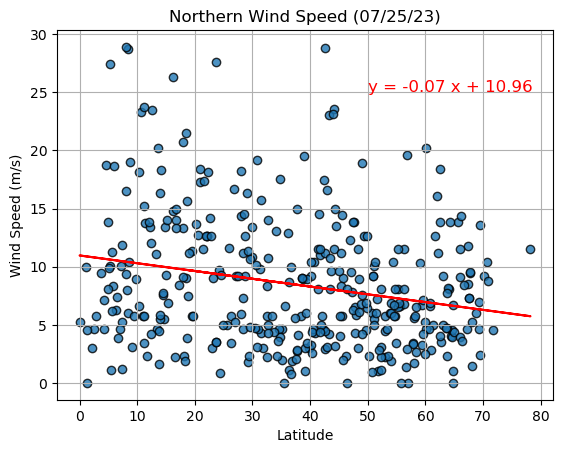

In [52]:
# Northern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = northern_hemi_df["Lat"]
winds = northern_hemi_df["Wind Speed"]

# scatter
plt.scatter(lats, winds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, winds)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (50,25), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Northern Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/northern/Wind Speed.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

r value is: -0.08999059965558726


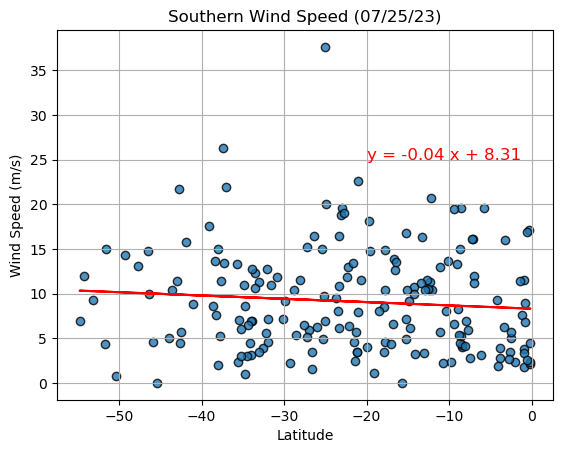

In [53]:
# Southern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = southern_hemi_df["Lat"]
winds = southern_hemi_df["Wind Speed"]

# scatter
plt.scatter(lats, winds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, winds)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (-20,25), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Southern Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/southern/Wind Speed.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

**Discussion about the linear relationship:** From both graph, we can say clearly, closer to lat0(equador) wind speed is reducing. Speed reducing is almost equal in both hemisphares. Slopes are almost equal in both graph.

### Bonus

### Show All Graphs on a single page

In [23]:
# We have created total of 12 graphs, i think, to see them on a sigle page would help more to visualize overall.
# I decided to put them on a single html page
# html is basically a text file, only extension is ".html" instead of ".txt"

In [61]:
contents = '<!DOCTYPE html>'
contents += '<html>'

contents += '<style>'
contents += 'body {font-family: segoe ui;}'
contents += '</style>'



contents += '<h3>Global Weather Analysis</h3>'
contents += '<table style="border-collapse:collapse">'

contents += '<tr>'
contents += '<td>Global <br>Weather <br>Variables <br><br>Among <br>~500 Cities</td>'
contents += '<td><img src="global/Temperature.png" width="400px"  /></td>'
contents += '<td><img src="global/Humidity.png"    width="400px"  /></td>'
contents += '<td><img src="global/Cloudiness.png"  width="400px"  /></td>'
contents += '<td><img src="global/Wind Speed.png"  width="400px"  /></td>'
contents += '</tr>'

contents += '<tr>'
contents += '<td>Northern <br>Hemisphere</td>'
contents += '<td><img src="northern/Temperature.png" width="400px"  /></td>'
contents += '<td><img src="northern/Humidity.png"    width="400px"  /></td>'
contents += '<td><img src="northern/Cloudiness.png"  width="400px"  /></td>'
contents += '<td><img src="northern/Wind Speed.png"  width="400px"  /></td>'
contents += '</tr>'

contents += '<td>Southern <br>Hemisphere</td>'
contents += '<td><img src="southern/Temperature.png" width="400px"  /></td>'
contents += '<td><img src="southern/Humidity.png"    width="400px"  /></td>'
contents += '<td><img src="southern/Cloudiness.png"  width="400px"  /></td>'
contents += '<td><img src="southern/Wind Speed.png"  width="400px"  /></td>'
contents += '</tr>'

contents += '<td height="100px">Conclusions</td>'
contents += '<td align="center">Getting closer to latitude 0, <br>Temperature is increasing in both hemisphere,<br> but southern, increasing is faster.</td>'
contents += '<td align="center">Getting closer to latitude 0, <br>Humidity is almost stable north hemisphere,<br> but southern, increasing significantly.</td>'
contents += '<td align="center">Getting closer to latitude 0, <br>Cloudines is decreasing in both hemisphere,<br> but southern, decreasing is faster.</td>'
contents += '<td align="center">Getting closer to latitude 0, <br>Wind speed is slightly decreasing in both hemisphere,<br> but not significant, negligible.</td>'
contents += '</tr>'

contents += '</table>'

contents += '<p>Hikmet Yigit <br> Toronto, Jul 20, 2023'
contents += '</html>'

# open and close re-writable file means clearing the existing file
# in other words, open the file and print "none" in it.
open('output_data/Global Weather Analysis.html', 'w').close()

# then writing contents in the lines of file
f = open("output_data/Global Weather Analysis.html", "a")
f.write(contents)
f.close()

In [62]:
#open and read the file after the appending:
f = open("output_data/Global Weather Analysis.html", "r")
print(f.read()) # just to make sure file is written as I wish

<!DOCTYPE html><html><style>body {font-family: segoe ui;}</style><h3>Global Weather Analysis</h3><table style="border-collapse:collapse"><tr><td>Global <br>Weather <br>Variables <br><br>Among <br>~500 Cities</td><td><img src="global/Temperature.png" width="400px"  /></td><td><img src="global/Humidity.png"    width="400px"  /></td><td><img src="global/Cloudiness.png"  width="400px"  /></td><td><img src="global/Wind Speed.png"  width="400px"  /></td></tr><tr><td>Northern <br>Hemisphere</td><td><img src="northern/Temperature.png" width="400px"  /></td><td><img src="northern/Humidity.png"    width="400px"  /></td><td><img src="northern/Cloudiness.png"  width="400px"  /></td><td><img src="northern/Wind Speed.png"  width="400px"  /></td></tr><td>Southern <br>Hemisphere</td><td><img src="southern/Temperature.png" width="400px"  /></td><td><img src="southern/Humidity.png"    width="400px"  /></td><td><img src="southern/Cloudiness.png"  width="400px"  /></td><td><img src="southern/Wind Speed.pn

### Wiev html page on web-browser

In [26]:
# Please open the file "output_data/Global Weather Analysis.html" in your file explorer to see on your web-browser.
# Web-browser is rendering the text file we just created.
# if you copy the files like below structure and open the html file, it will work on your machine
# your directory
#  ├───Global Weather Analysis.html
#  ├───global
#  ├  └───4 png files...
#  ├───northern
#  ├   └───4 png files...
#  └───southern
#      └───4 png files...

In [27]:
# I put it on to my own server
# here is the link

print("https://www.controlsystemdesign.io/Module6Challenge/Global%20Weather%20Analysis.html")

https://www.controlsystemdesign.io/Module6Challenge/Global%20Weather%20Analysis.html
